In [1]:
import pandas as pd

# Load the Titanic dataset
train_df = pd.read_csv(r"C:\Dev\GIT\DataScience_Bootcamp\Week5\titanic\train.csv")
test_df = pd.read_csv(r"C:\Dev\GIT\DataScience_Bootcamp\Week5\titanic\test.csv")

# Display the first few rows of the training dataset
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Checking for missing values in the training dataset
missing_values = train_df.isnull().sum()
missing_values_percentage = (missing_values / len(train_df)) * 100

print(missing_values_percentage)




PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [3]:
# Filling missing values

# Cabin has too many missing values, so we will drop it if it exists
if 'Cabin' in train_df.columns:
	train_df.drop(columns=['Cabin'], inplace=True)
if 'Cabin' in test_df.columns:
	test_df.drop(columns=['Cabin'], inplace=True)

# Filling missing Age values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Filling missing Embarked values with the most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Checking again for missing values
missing_values_after = train_df.isnull().sum()
print(missing_values_after)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\enyi2\AppData\Local\Temp\ipykernel_21144\1312773287.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\enyi2\AppData\Local\Temp\ipykernel_21144\1312773287.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [4]:
# Encoding categorical variables

# Convert 'Sex' column to numeric values: male -> 0, female -> 1
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)




C:\Users\enyi2\AppData\Local\Temp\ipykernel_21144\986043530.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='coolwarm')


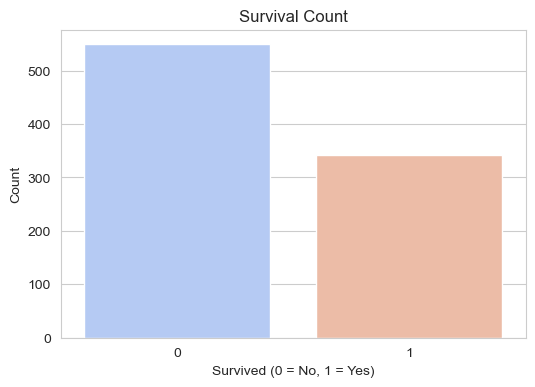

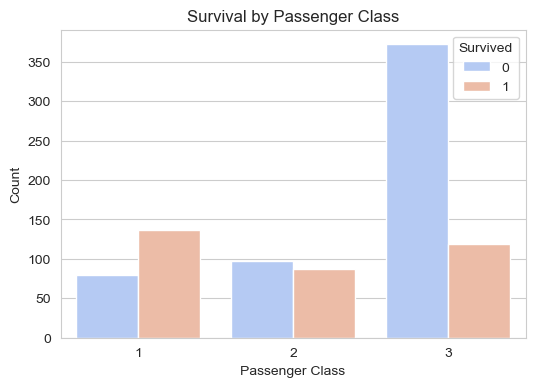

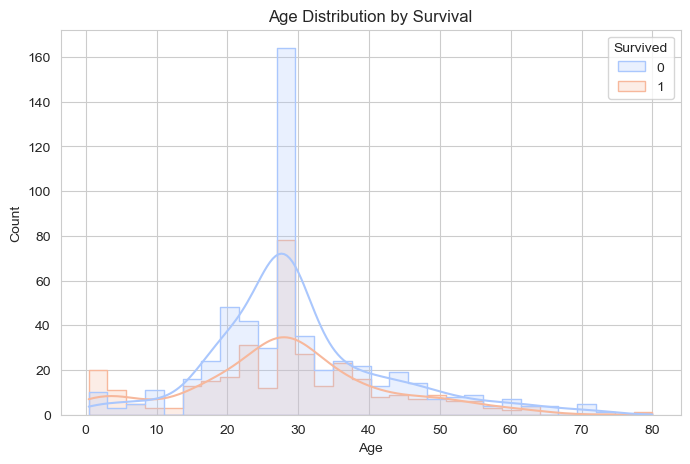

C:\Users\enyi2\AppData\Local\Temp\ipykernel_21144\986043530.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=train_df, palette="coolwarm")


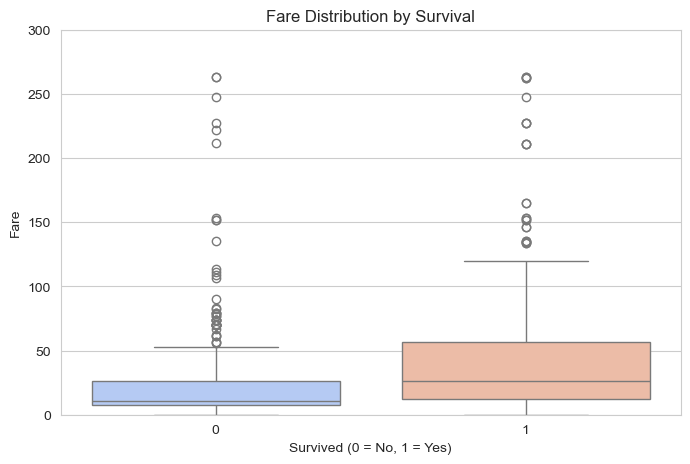

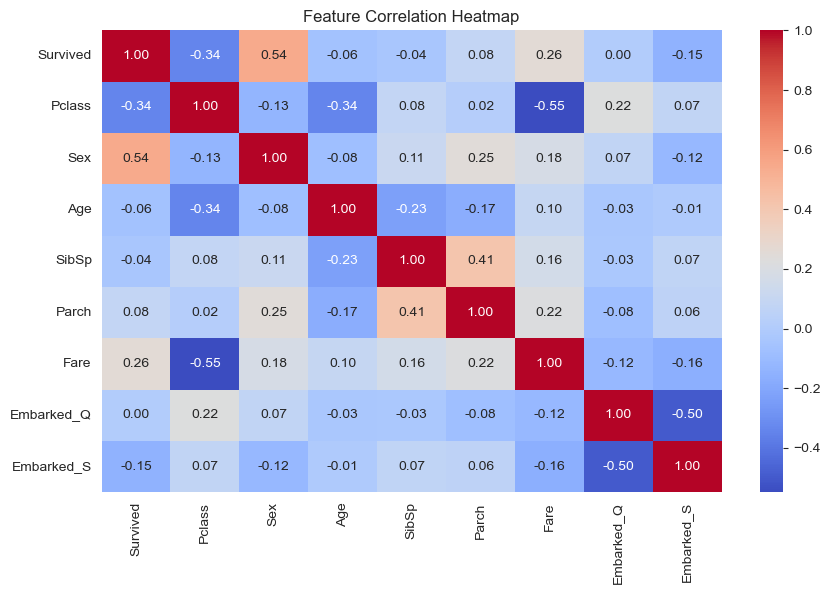

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plotting survival count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Plotting survival by class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

# Distribution of Age by Survival
plt.figure(figsize=(8, 5))
sns.histplot(train_df, x="Age", hue="Survived", bins=30, kde=True, palette="coolwarm", element="step")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Fare distribution by survival
plt.figure(figsize=(8, 5))
sns.boxplot(x="Survived", y="Fare", data=train_df, palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.ylim(0, 300)  # Limiting to remove outliers
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# Dropping unnecessary columns
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Splitting the dataset into features (X) and target (y)
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']

# Implementing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_split, y_train_split)

# Predicting on validation set
y_pred = log_reg.predict(X_val)

# Evaluating model performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

accuracy, conf_matrix, class_report


(0.8100558659217877,
 array([[90, 15],
        [19, 55]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n')